<a href="https://colab.research.google.com/github/reeda23/OpenCV102--Basic-Image-Processing-Operations/blob/main/9_auto_canny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os

In [2]:
#func to display images 
def plt_showimage(title, image):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

In [7]:
def auto_canny(image, sigma =0.33): #lower values of sigma means tighter edge bound and larger values means wider edge map
    #compute the median of single channel image
    v = np.median(image)

    #apply auto canny edge detection
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edged = cv2.Canny(image, lower, upper)

    return edged

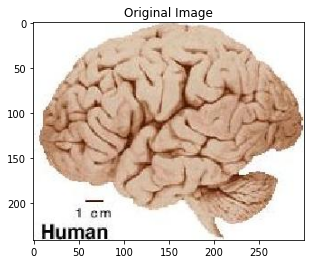

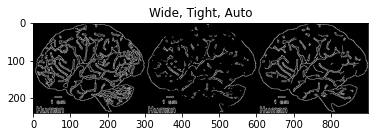

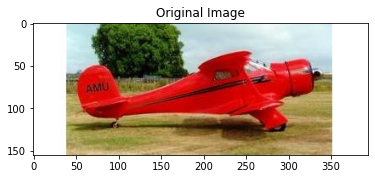

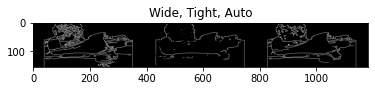

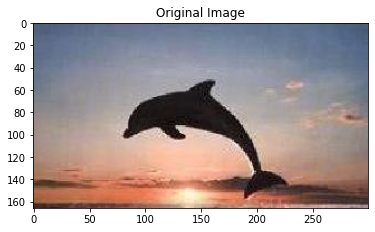

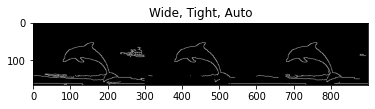

In [11]:
imagepath = "/content/drive/MyDrive/OpenCV102 - Basic Image Processing Operations/images/"

for image in os.listdir(imagepath):
 
    image = cv2.imread(imagepath+image)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    blurred = cv2.GaussianBlur(gray, (3,3), 0)

    wide =cv2.Canny(blurred, 10,200)
    tight = cv2.Canny(blurred, 240,250)
    auto = auto_canny(blurred)

    plt_showimage("Original Image", image)
    plt_showimage("Wide, Tight, Auto", np.hstack([wide,tight,auto]))